# Lab1: Gradient descent principles

**Carla Sendra Balcells**\
**Roxane Le Tensorer**\
**Rachel Trimble**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We first create a function called "creation". This function will be used in the entire lab, only changing the parameters which are : <br>
- function : can be a convex function, a more complex function or the rosenbrock function.<br>
- method : can be the gradient descent method, the gradient descent method with stopping criterion, or the newton method.<br>
- alpha : the $\alpha$ we use in the algorithm.<br>
- iters : max number if iterations of the system. In general, this is 100. <br>
- choice_x : can be the string "random", which means that the algorithm will pick random values for x0, or an array containing the three values of x0.

In [10]:
def creation(function, method, alpha,iters, choice_x):
    fig = plt.figure(figsize=(20,5))

    num_plots = 3
    base = 100 + num_plots * 10

    for i in range(num_plots):
        ax = fig.add_subplot(base+(1+i))

        X = np.arange(-3, 3, 0.05)
        Y = np.arange(-3, 3, 0.05)
        X, Y = np.meshgrid(X, Y)
        
        
        Z = function([X,Y])[0];
        ax.contour(X, Y, Z, 50)
        
        function_grad = function([X,Y])[1]

        gradx = function_grad[0];
        grady = function_grad[1];
        ax.streamplot(X, Y, gradx, grady)

        if (choice_x == "random") :
            x_lim = 3.5
            x = x_lim*np.random.random(2) - x_lim/2
        else :
            x=choice_x[i]
        
        ax = method(x, ax, alpha, iters, function)

    plt.show()

### 1. Gradient descent method
#### 1.1. A simple quadratic function

$f(x)=x_1^2+x_2^2$ where $\nabla f(x)=(2x_1, 2x_2)$ is the gradient.

We create our convex function. It returns an array with 2 elements : 
- the function itself<br>
- an array representing its gradient<br>

In [3]:
def convex1(x):
    return [x[0]**2+x[1]**2,[2*x[0], 2*x[1]]]

We then define a function which does the gradient descent:

$x^{k+1}=x^k-\alpha^k\nabla f(x^k)$ where k is the iteration

In [4]:
def grad_desc(x0, fig, alpha, iters, function):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    for k in range(iters):
        grad = function(x0)[1]
        x0 = x0 - alpha * np.array(grad)
        
        fig.plot(*x0, 'r.')
         
    print("solution : %.20f, %.20f"%(x0[0],x0[1]))
    fig.plot(*x0, 'b+')
    return fig

Then, we call the creation function, with the corresponding parameters. For the moment, we are only using random x0, in order to try a lot of different possibilities.

solution : 0.00000000018016777735, 0.00000000002482276170
solution : 0.00000000011512782890, 0.00000000001887248390
solution : 0.00000000033965285173, -0.00000000014952533447


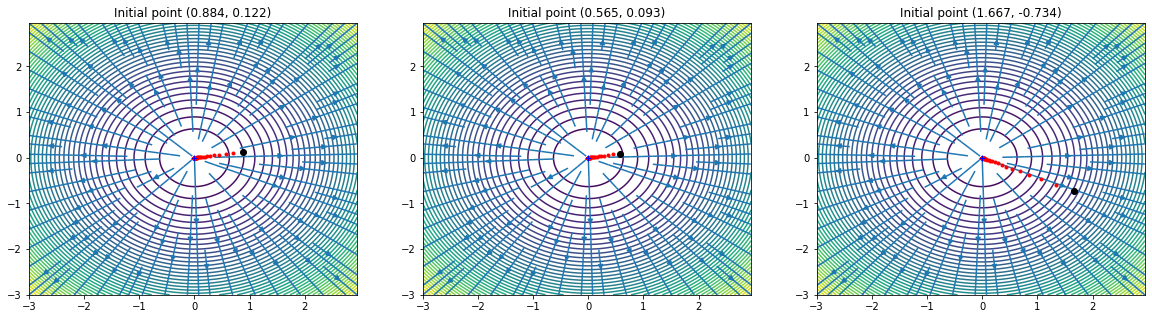

In [12]:
creation(convex1, grad_desc, 0.1, 100, 'random')

We test the algorithm setting $\alpha$ = 0.1, and plot the contour graph of the function with the path the gradient descent follows. The initial point is represented with a black dot, each step is represented with a red dot, and the minimum is represented with a blue cross.

We tested the algorithm with three different $x_0$ starting points generated randomly to demonstrate that no matter what the starting point is we always converge to the minimum. 

It is clear from the result that the only minimum this function has is zero (and this makes sense since it is a convex function with just one minima) with all of the three random $x_0$ merging to zero.  

We then tested the same algorithm but with 1,000 iterations instead of 100. This resulted in a solution closer to zero compared to the one achieved above for 100 indicating that the more iterations that are tested the closer the solution arrives to the minimum.

solution : -0.00000000000000000000, 0.00000000000000000000
solution : 0.00000000000000000000, 0.00000000000000000000
solution : -0.00000000000000000000, -0.00000000000000000000


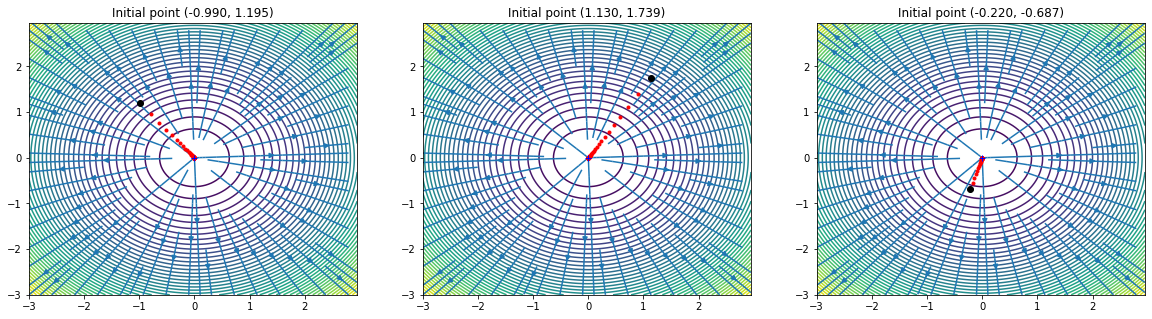

In [6]:
creation(convex1, grad_desc, 0.1, 1000, 'random')

However it should be noted that the difference is not significant and hence it is not necessary to perform 1,000 iterations. In fact if we add a precision of 0.0001 we get convergence after just 25 steps. 

Next we test adjusting the value of $\alpha=1$. We should see some difference now, since this parameter defines the magnitude of the step used for the gradient descent method. If the value is bigger it might seem that the convergence will be faster but we check that this is not the case.

solution : 0.32698735910701159924, -0.60866783572160443327
solution : -0.55068798155109766057, 0.71145831428335304381
solution : -0.28775347671676132499, 0.07469446486214681435


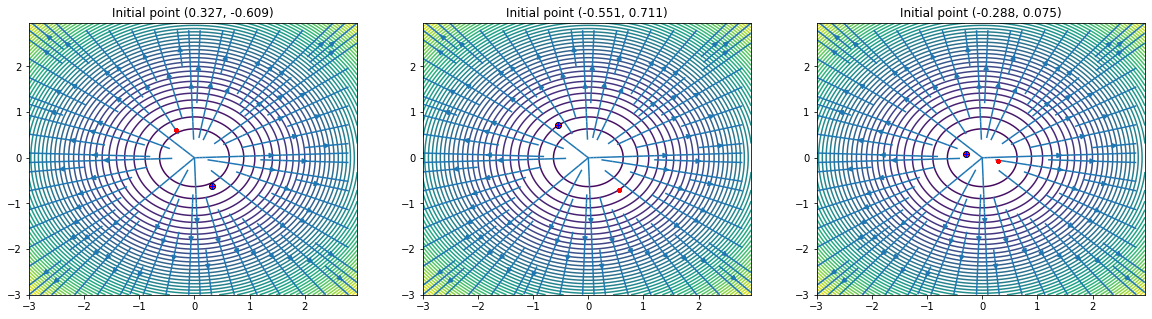

In [7]:
creation(convex1, grad_desc, 1, 100, 'random')

This time, we do not get convergence. This situation is very interesing, because the inverse of any gradient vectors in this case can be represented with a line whose middle is precisely the minimum of the function. That's the reason why, by having $\alpha$ = 1, the x is only going from one extremity of this line to the other, without having the possibility to reach the middle.<br>

We can now try with a value really close to 1, with a value of 0.95

solution : -0.00002928542402563573, -0.00002305814649321954
solution : 0.00004112541528385831, 0.00001231533971419288
solution : -0.00002174256710266521, 0.00000411537157190869


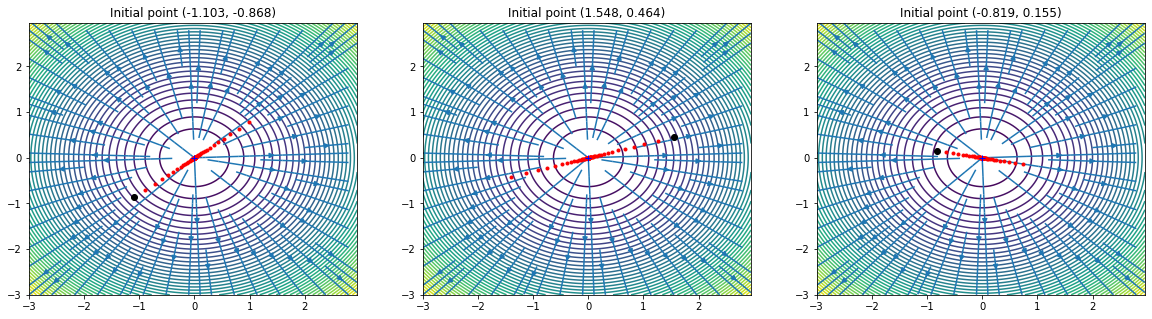

In [8]:
creation(convex1, grad_desc, 0.95, 100, 'random')

In this case, we can see that the algorithm achieves the goal of converging to the minimum, but this is not efficient since it always exceeds the solution and has to go back and forth, each time getting a little bit closer, until reaching the minimum.<br>
Finally, we can try the algorithm with $\alpha$ = 2 :

solution : 884540753471.64624023437500000000, 1130602899579.74560546875000000000
solution : 1449946201823.43847656250000000000, 1049323911832.49340820312500000000
solution : -521094460971.52746582031250000000, -1151489845857.96997070312500000000


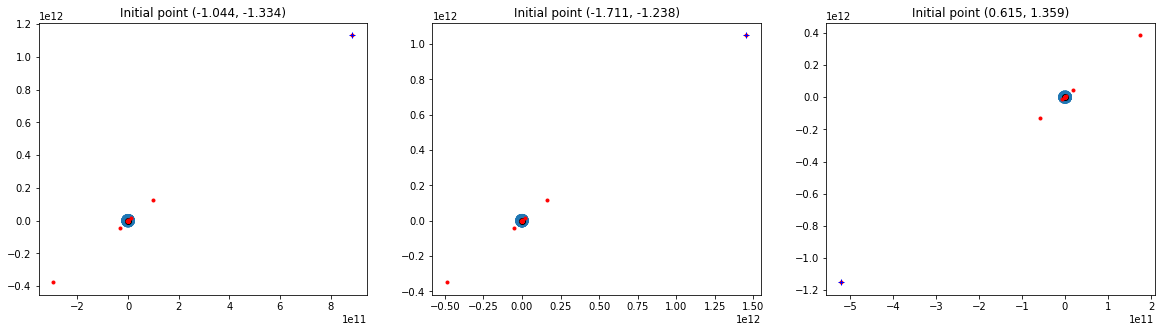

In [13]:
creation(convex1, grad_desc, 2, 25, 'random')

As we could expect, with $\alpha$ > 1, it as totally impossible for the algorithm to converge to the minimum, because it is always moving away from it. This is the reason why the result we obtain at the end has no sense. <br>
We can see then that it is necessary to have : 0 < $\alpha$ < 1. 

#### 1.2. A more complex function

$f(x_1,x_2)= x_1^2(4 - 2.1x_1^2 + \frac{1}{3}x_1^4) + x_1x_2 + x_2^2(-4+4x_2^2)$\
where  $\nabla f(x)=(2x_1^5-8.4x_1^3+8x_1+x_2, x_1+16x_2^3-8x_2)$ 

We are now working on a more complex function. As for the precedent one, we create the corresponding function. But this time, it returns an array with three elements : 
- the function itself
- an array representing the gradient 
- an array representing the hessian matrix
    
It is absolutely not possible to guess which minima of this function are going to be found, as the minima will depend on the starting point. So in this case we might have several local minimum. 

In [17]:
def function_x(x):
    X=x[0]
    Y=x[1]
    func = (X**2)*(4-(2.1*(X**2))+(1/3)*(X**4))+X*Y+(Y**2)*(-4+4*(Y**2))
    
    gradx = 2*X**5 - 8.4*X**3 + 8*X + Y
    grady = X + 16*Y**3 - 8*Y
    grad = [gradx, grady]
    
    hess11 = 10*X**4-25.2*X**2+8
    hess12 = 1
    hess22 = 48*Y**2-8
    hess21 = 1
    hess = [[hess11,hess12],[hess21,hess22]]
    
    return[func, grad, hess]

We begin with the simple algorithm explained before, with only 100 iterations. Since here it is harder to get the minima we will use a very small $\alpha$ value. If not, depending on the initial point the algorithm can't converge inside the gradient descent map. 

solution : 0.08984101458911479543, -0.71265628819554882600
solution : 0.08984197801786286686, -0.71265639898639399075
solution : 0.08984274717864311477, -0.71265648743671283771


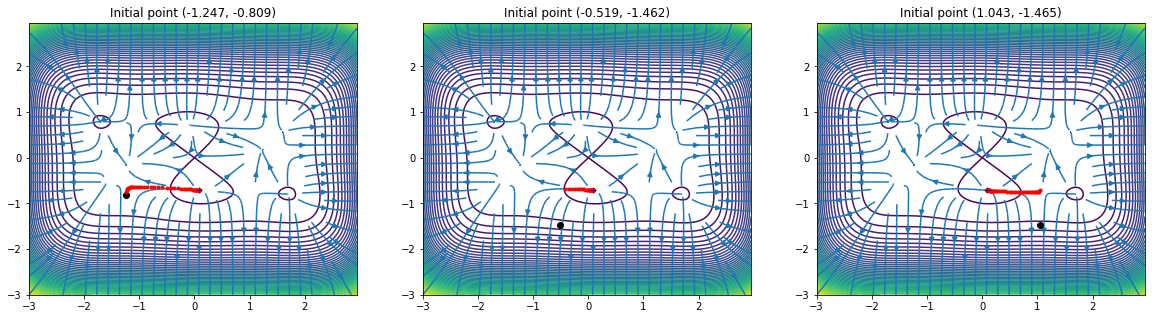

In [18]:
creation(function_x, grad_desc, 0.02, 100, 'random')

We can see here that the algorithm works, and most of the time the minimum is found in the same valley as the original x. However, it is also easy to get a local minimum. 

Now, we will create a new algorithm which will stop depending on some criterion, in order to make the process more efficient: 
- Our algorithm is updating the points even though the minimum has already been reached, so now our two stop conditions will be:

    $|f(x_{k+1})-f(x_k)|<10^{-8}\ \ \ \ \text{or}\ \ \ \ ||\nabla f(x_k)|| < 10^{-5}$
    
  The first condition will be accomplished if the step is no longer meaningful. On the other hand, we know that the gradient is   zero in a critical point, so we use this fact for the second condition.<br><br>

- The second way is to control the magnitude of the step, $\alpha$. We begin with a large value and we update it. If the   function increases we reduce by half its value and try again.

We decide here to write not only the solution obtained, but also the number of iterations needed.

In [27]:
def grad_desc_criterion(x0, fig, alpha, iters, function):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    f0 = function(x0)[0]
    
    for i in range(iters):
        grad = function(x0)[1]
        x = x0 - alpha * np.array(grad)
        f = function(x)[0]
        while (f>f0): 
            alpha = alpha/2
            x = x0 - alpha * np.array(grad)
            f = function(x)[0]
        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-8) | (np.linalg.norm(grad) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.20f, %.20f"%(x[0],x[1]))
            break
        f0=f    
        x0=x
    fig.plot(*x0, 'b+')
    
    return fig

In order to see the efficience of this new algorithm, we decide here not tu use a random x0 anymore. We choose (1,1), (2,2) and (-1,-1) as the x0 we are testing, and we are then comparing the gradient descent method with the gradient descent with criterion method. <br><br>
Gradient descent with criterion :

number of points : 9
solution : 0.08988880297870908975, -0.71266716959074805082
number of points : 22
solution : 1.70356349028220344088, -0.79605076181368583654
number of points : 9
solution : -0.08988880297870908975, 0.71266716959074805082


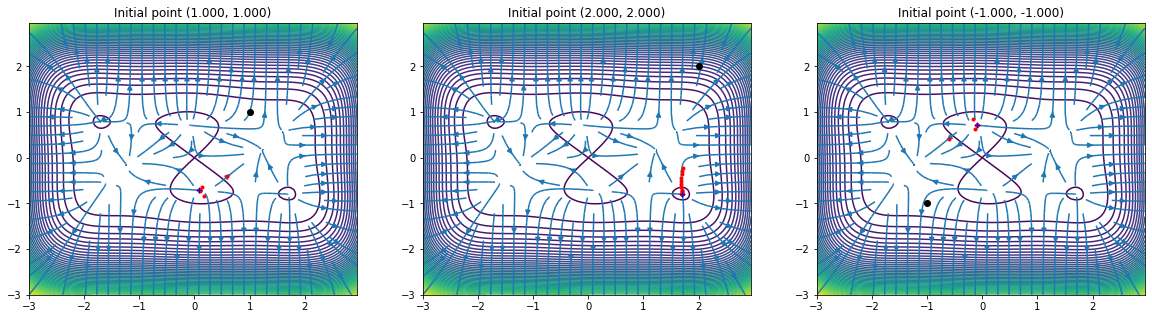

In [28]:
creation(function_x, grad_desc_criterion, 5, 1000, [(1,1),(2,2),(-1,-1)])

Gradient descent without criterion :

solution : -0.08984188999978612311, 0.71265638886465487722
solution : 1.70360671496998050678, -0.79608356867262497492
solution : 0.08984188999978612311, -0.71265638886465487722


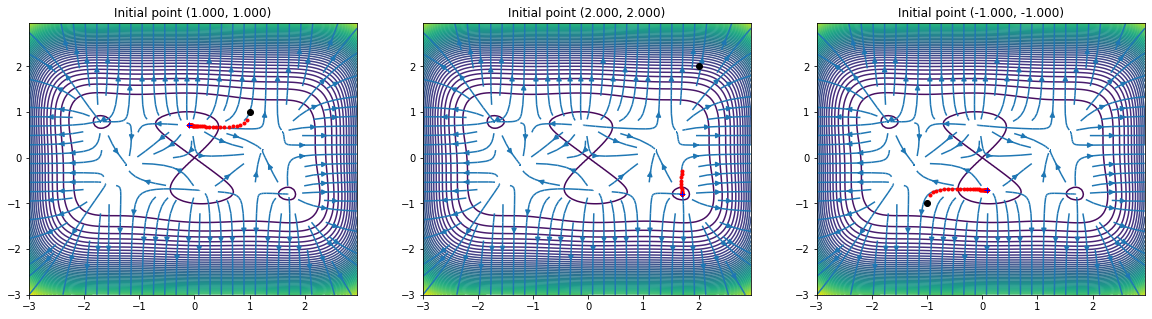

In [26]:
creation(function_x, grad_desc, 0.02, 100, [(1,1),(2,2),(-1,-1)])

The backtracking algorithm proves to be more efficient at finding the minimum with just around 10 iterations needed. This is because the $\alpha$ value can be higher at the beginning and so the steps are higher and make the x be closer to the minimum faster. Moreover, since the steps are higher, the probability to get stuck in a minimum is reduced. And apart from this the stop criterion makes the algorithm stop when it reaches the minimum. 

#### 1.3. The Rosenbrock function

$f(x_1,x_2)= (a-x_1)^2 + b(x_2-x_1^2)^2$\
where  $\nabla f(x)=(-2(a-x_1)-4x_1b(x_2-x_1^2), 2b(x_2-x_1^2)$ with a=1 and b=100.

In [29]:
def rosenbrock(x):
    X=x[0]
    Y=x[1]
    a=1
    b=100
    func = (a-X)**2 + b*((Y-X**2)**2)
    
    gradx = -2+2*X-400*X*Y+400*X**3
    grady = 200*Y-200*X**2
    grad = [gradx, grady]
    
    hess11 = 2+1200*X**2-400*Y
    hess12 = -400*X
    hess21 = -400*X
    hess22 = 200
    hess = [[hess11,hess12],[hess21,hess22]]
    
    return[func, grad, hess]

The last exercise is repeated for this different case:

number of points : 4410
solution : 0.99205846125326102580, 0.98414805954549966494
number of points : 4288
solution : 0.99205724922058158288, 0.98414564983585495206
number of points : 8879
solution : 0.98879495463751854167, 0.97767032108813323177


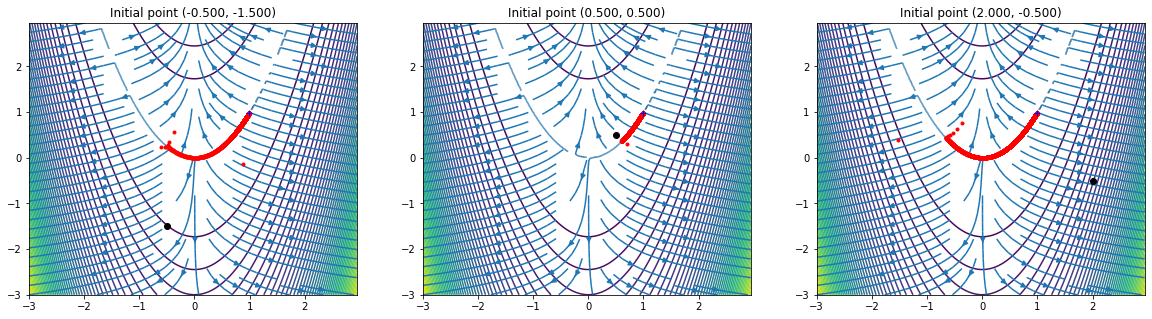

In [48]:
creation(rosenbrock,grad_desc_criterion, 1, 10000, 'random')

Even though this function has just 1 minimum (1, 1) it is very difficult to reach it due to its shape. As expected the minimum for Rosenbrock function is not found efficiently, with 9-10 thousand iterations needed. 

### 2. Newton descent method

For the Newton Descent algorith we will use the following expression: $$x^{k+1} = xk + \alpha^k d^k$$

Where $d^k$ is the so called Newton direction of the descent is obtained solving:
$$\nabla^2 f(x^k) d^k = -\nabla f(x^k)$$

The convergence criterion for this method will be the same as the one used in Gradient descent.
#### 2.1. A simple quadratic function

$f(x) = 100x_1^2+x_2^2$ where $\nabla f(x)=(200x_1, 2x_2)$ 

First, we are going to solve the problem using the Gradient descent method as we've been doing until this point. Again, we don't use a random x0:

In [31]:
def convex2(x):
    func = 200*x[0]**2+x[1]**2
    grad = [200*x[0], 2*x[1]]
    hess = np.array([[200,0],[0,2]])
    return[func, grad, hess]

number of points : 358
solution : -0.00000000000000000000, 0.00175233283162465141
number of points : 446
solution : -0.00000000000000000000, 0.00175310218332293895
number of points : 402
solution : 0.00000000000000000000, -0.00175271746526062884


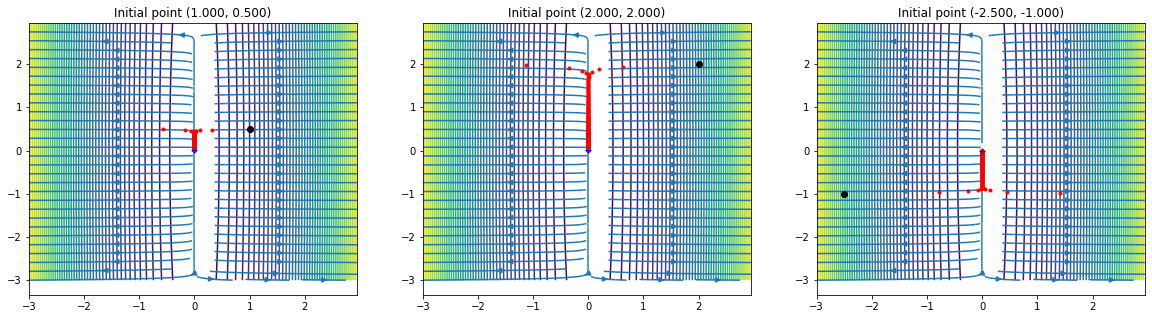

In [33]:
creation(convex2,grad_desc_criterion, 1, 10000, [(1,0.5),(2,2),(-2.5,-1)])

In this case we can see that after several iterations the Gradient descent method reaches the minimum. Let's see how the Netwon descent method works for this case, with the same x0 as we used before:

In [34]:
def newton(x0, fig, alpha, iters, function):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    for i in range(iters):
        
        grad = np.array(function(x0)[1])
        hessMatrix = np.array(function(x0)[2])
        
        
        #check if Hessian Matrix is definite positive
        positive = np.all(np.linalg.eigvals(hessMatrix) > 0)
        
        if positive:
            x = x0 - alpha * np.linalg.solve(hessMatrix,grad)
        else:
            x = x0 - alpha * grad
        
        #backtracking for alpha
        f0 = function(x0)[0]
        f = function(x)[0]
        while (f>f0): 
            alpha = alpha/2
            if positive:
                x = x0 - alpha * np.linalg.solve(hessMatrix,grad)
            else:
                x = x0 - alpha * grad
            f = function(x)[0]
        
        #stop criterion 
                          
        if positive:
            fig.plot(*x0, 'g.') 
        else:
            fig.plot(*x0, 'r.') 
           
        if(np.abs(f-f0) < 10e-8) | (np.linalg.norm(grad) < 10e-5):
            break
        f0=f
        x0=x
            
    print("number of iterations : %i"%i)
    print("solution : %.3f, %.3f"%(x0[0],x0[1]))
    fig.plot(*x0, 'b+')
    
    return fig

number of iterations : 1
solution : 0.000, 0.000
number of iterations : 1
solution : 0.000, 0.000
number of iterations : 1
solution : 0.000, 0.000


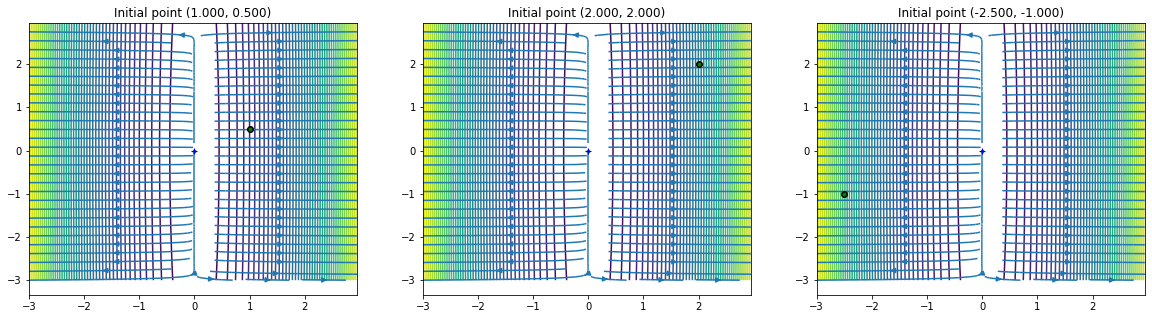

In [35]:
creation(convex2,newton, 1, 10000 , [(1,0.5),(2,2),(-2.5,-1)])

The Newtons Descent Method is much faster and efficient, it can reach the minimum with just one iteration. This is mainly because the step magnitude is much higher in this case, the only limitation is that it is more computationally expensive if you have to deal with large number of variables and can only be computed if the point where the function is evaluated has a positive definite Hessian. <br>
In this case, because the function is a simple convex function, the minimum of the quadratic approximation of the function is naturally the minimum of the function itself. This is the reason why the first step directly goes the minimum if the function.

#### 2.2. A more complicated function
##### 1) Gradient descent algorithm
already did that : 1.2.2

##### 2) Newton - Gradient descent algorithm

number of iterations : 46
solution : 0.090, -0.712
number of iterations : 7
solution : 1.607, 0.569
number of iterations : 46
solution : -0.090, 0.712


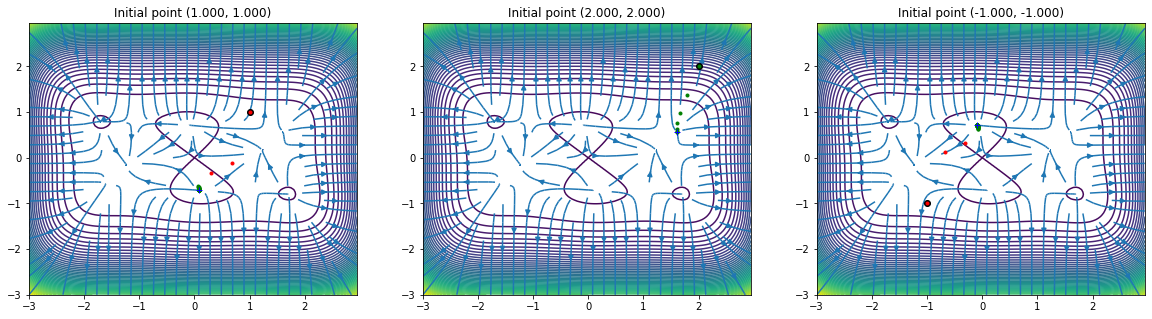

In [36]:
creation(function_x, newton, 1, 100, [(1,1),(2,2),(-1,-1)])

#### 2.3. Rosenbrock function


We are now trying to compare the Newton algorithm with the gradient descent algorithm for the Rosenbrock function. For that, we are using different kinds of x0 : (0.9,0.9) is very close from the minimum, (2,-0.5) is a normal value, and we are also trying (100,100) which is very far from the minimum, in order to see the different results. 

number of iterations : 2577
solution : 0.997, 0.994
number of iterations : 45
solution : 1.000, 1.001
number of iterations : 5877
solution : 1.003, 1.005


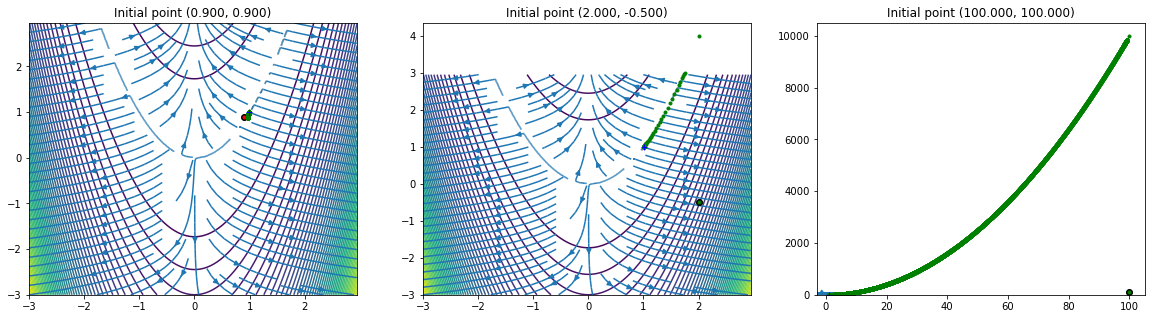

In [52]:
creation(rosenbrock, newton, 1, 10000, [(0.9,0.9),(2,-0.5),(100,100)])

In [ ]:
creation(rosenbrock, grad_desc_criterion, 1, 10000, [(0.9,0.9),(2,-0.5),(100,100)])

number of points : 2547
solution : 0.99206073570982489240, 0.98415258152712470352
number of points : 8879
solution : 0.98879495463751854167, 0.97767032108813323177


<ipython-input-29-c9daba027ccc>:6: RuntimeWarning: overflow encountered in long_scalars
  func = (a-X)**2 + b*((Y-X**2)**2)
<ipython-input-29-c9daba027ccc>:8: RuntimeWarning: overflow encountered in long_scalars
  gradx = -2+2*X-400*X*Y+400*X**3
<ipython-input-29-c9daba027ccc>:9: RuntimeWarning: overflow encountered in long_scalars
  grady = 200*Y-200*X**2
<ipython-input-29-c9daba027ccc>:12: RuntimeWarning: overflow encountered in long_scalars
  hess11 = 2+1200*X**2-400*Y
<ipython-input-29-c9daba027ccc>:13: RuntimeWarning: overflow encountered in long_scalars
  hess12 = -400*X
<ipython-input-29-c9daba027ccc>:14: RuntimeWarning: overflow encountered in long_scalars
  hess21 = -400*X


It's interesting to see that, in the first case, with x0 = (0.9,0.9), the Newton algorithm is not very efficient. It is less precise (because the result is closer to (1,1)) and a little less fast (because to result is obtained with 2577 iterations, instead of 2547) than the Gradient Descent algorithm. <br>
However, with the second value, the Newton algorithm is much faster (45 iterations instead of 8879), and has the same precision. <br>
With the third value, the Gradient Descent can't find the minimum, because it is too high. The Newton algorithm, on the other hand, succeeds to find the minimum, even if it recquires a lot of iterations.